<h2 style="color: #40a3ff;">Moondream3 Preview</h2>
<p><img src="https://moondream.ai/_next/image?url=%2Fimages%2Fblog%2Fmoondream-3-preview%2Ftitle-image.jpg&w=1920&q=75" alt="Moondream3" style="height:400px"> <img src="md_logo.svg" alt="Moondream3-Logo" style="height:400px"></p>

In [7]:
import torch
import time
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
from transformers import AutoModelForCausalLM, AutoTokenizer

In [3]:
moondream = AutoModelForCausalLM.from_pretrained(
    "moondream/moondream3-preview",
    trust_remote_code=True,
    dtype=torch.bfloat16,
    device_map={"": "cuda"},
)
moondream.compile()

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
print(moondream)

HfMoondream(
  (model): MoondreamModel(
    (vision): ModuleDict(
      (patch_emb): Linear(in_features=588, out_features=1152, bias=True)
      (blocks): ModuleList(
        (0-26): 27 x ModuleDict(
          (ln1): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
          (attn): ModuleDict(
            (qkv): Linear(in_features=1152, out_features=3456, bias=True)
            (proj): Linear(in_features=1152, out_features=1152, bias=True)
          )
          (ln2): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
          (mlp): ModuleDict(
            (fc1): Linear(in_features=1152, out_features=4304, bias=True)
            (fc2): Linear(in_features=4304, out_features=1152, bias=True)
          )
        )
      )
      (post_ln): LayerNorm((1152,), eps=1e-05, elementwise_affine=True)
      (proj_mlp): ModuleDict(
        (fc1): Linear(in_features=2304, out_features=8192, bias=True)
        (fc2): Linear(in_features=8192, out_features=2048, bias=True)
      )
    )
  

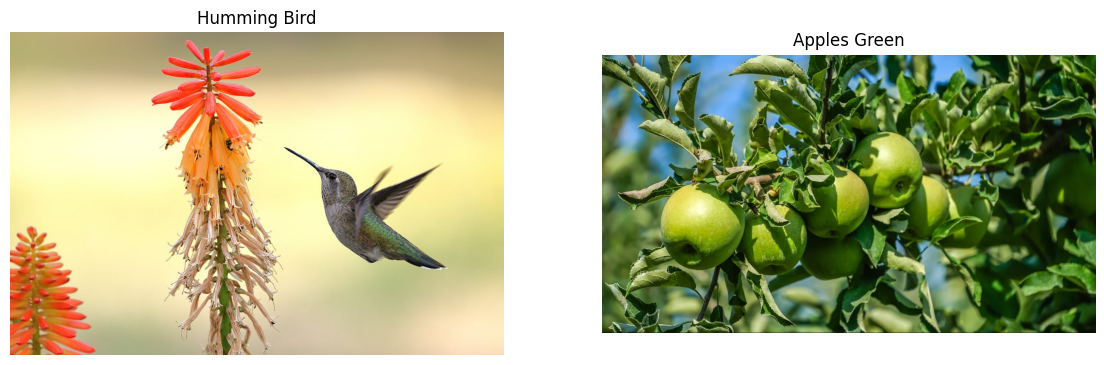

In [5]:
# Different caption lengths
bird_img = Image.open("../../tasks/bird.jpg")
apple_img = Image.open("../../tasks/apples.png")

# Display the image
plt.figure(figsize=(14,7))
plt.subplot(121); plt.imshow(bird_img); plt.title("Humming Bird"); plt.axis('off');
plt.subplot(122); plt.imshow(apple_img); plt.title("Apples Green"); plt.axis('off');


In [ ]:
!dir

### Short Caption

In [11]:
# Long caption
torch.cuda.reset_peak_memory_stats()
t1 = time.time()
short = moondream.caption(bird_img, length="short")
t2 = time.time()

peak = torch.cuda.max_memory_allocated() / (1024**3)
print(f"Peak memory: {peak:.2f} GB")
print(f"Time taken : {round(t2-t1,2)} s")
print(f"\nShort: {short['caption']}")

Peak memory: 18.27 GB
Time taken : 13.9 s

Short: A hummingbird hovers near a tall flower with orange and red blossoms, its wings blurred in motion against a soft yellow-green background.


### Medium Caption

In [10]:
# Long caption
torch.cuda.reset_peak_memory_stats()
t1 = time.time()
normal = moondream.caption(bird_img, length="normal")
t2 = time.time()

peak = torch.cuda.max_memory_allocated() / (1024**3)
print(f"Peak memory: {peak:.2f} GB")
print(f"Time taken : {round(t2-t1,2)} s")
print(f"\nNormal: {normal['caption']}")

Peak memory: 18.27 GB
Time taken : 27.95 s

Normal: A hummingbird is captured in mid-flight near a vibrant orange and white flower. The bird's wings are outstretched, and its beak is pointed downward. The flower features a prominent central spike with smaller spikes extending outward, creating a striking contrast in color and texture. The background is a soft, blurred blend of yellow and green hues, providing a natural and serene setting for the scene.


### Long Caption

In [8]:
# Long caption
torch.cuda.reset_peak_memory_stats()
t1 = time.time()
long = moondream.caption(bird_img, length="long")
t2 = time.time()

peak = torch.cuda.max_memory_allocated() / (1024**3)
print(f"Peak memory: {peak:.2f} GB")
print(f"Time taken : {round(t2-t1,2)} s")
print(f"\nLong: {long['caption']}")

Peak memory: 18.33 GB
Time taken : 73.54

Long: The image presents a close-up view of a hummingbird in mid-flight, hovering near a vibrant flower. The hummingbird is positioned slightly to the right of the center of the frame, with its wings fully extended and its body angled downward. Its long, slender beak is pointed downward, and its body is covered in gray feathers with hints of green on its wings. The hummingbird's tail is black, and its wings are spread out, indicating its active state.

The flower is a striking feature of the image, located on the left side of the frame. It is tall and slender, with a reddish-orange color at the top transitioning to a pale yellow-orange at the bottom. The flower's structure is intricate, with numerous thin filaments extending outward. At the base of the flower, there is a small green stem. The flower's color gradient adds a dynamic element to the composition.

The background of the image is a soft, blurred yellow-green gradient, which helps to e

In [12]:
num_params = sum(p.numel() for p in moondream.parameters())
print("Parameters:", num_params)

dtype = next(moondream.parameters()).dtype
bytes_per_param = {torch.float32: 4, torch.float16: 2, torch.bfloat16: 2}.get(dtype, 4)
size_gb = num_params * bytes_per_param / (1024**3)
print(f"Approx size in memory: {size_gb:.2f} GB")

Parameters: 9268622832
Approx size in memory: 17.26 GB
